In [ ]:
#
# Google Colab setup
#
#!git clone https://github.com/Doctorado-ML/STree.git
# Set working dir to Stree
#import os
#os.chdir("STree")

In [1]:
import time
import random
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from trees.Stree import Stree
from trees.Sgrapher import Sgrapher

In [4]:
random_state=1

X, y = make_blobs(centers=10, n_features=3, n_samples=1500)
def make_binary(y):
    for i in range(2, 10):
        y[y==i] = random.randint(0, 1)
    return y
y = make_binary(y)
print(X.shape, np.unique(y), y[y==0].shape, y[y==1].shape)

(1500, 3) [0 1] (750,) (750,)


In [5]:
gr = Sgrapher(dict(C=.01, max_iter=200))
gr.fit(X, y)

Sgrapher(C=0.01, max_iter=200, random_state=0)

In [6]:
print(gr)

root
root - Down
root - Down - Down
root - Down - Down - Down
root - Down - Down - Down - Down, <cgaf> - Leaf class=1 belief=0.948882 counts=(array([0, 1]), array([ 32, 594]))
root - Down - Down - Down - Up, <cgaf> - Leaf class=0 belief=0.854167 counts=(array([0, 1]), array([41,  7]))
root - Down - Down - Up
root - Down - Down - Up - Down, <cgaf> - Leaf class=1 belief=0.913043 counts=(array([0, 1]), array([ 4, 42]))
root - Down - Down - Up - Up, <cgaf> - Leaf class=0 belief=0.935065 counts=(array([0, 1]), array([72,  5]))
root - Down - Up, <pure> - Leaf class=1 belief=1.000000 counts=(array([1]), array([47]))
root - Up
root - Up - Down, <cgaf> - Leaf class=1 belief=0.864407 counts=(array([0, 1]), array([ 8, 51]))
root - Up - Up, <cgaf> - Leaf class=0 belief=0.993300 counts=(array([0, 1]), array([593,   4]))



In [8]:
from trees.Snode import Snode
import copy
arbol = copy.deepcopy(gr._tree)
def copy_tree():
    pass
arbol._title='sssssroot'

In [10]:
print(gr._tree)

root


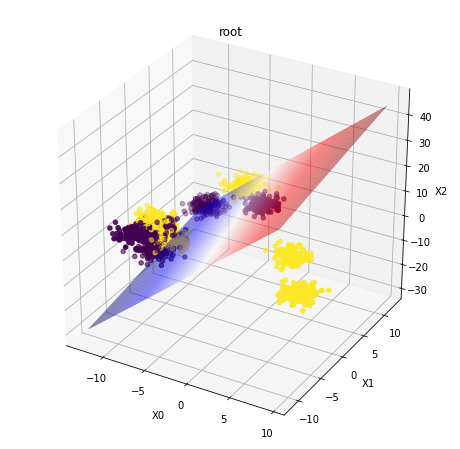

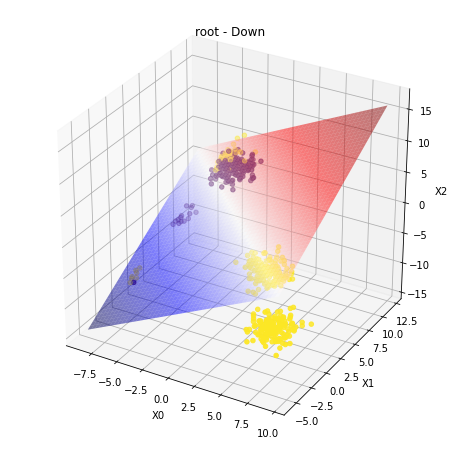

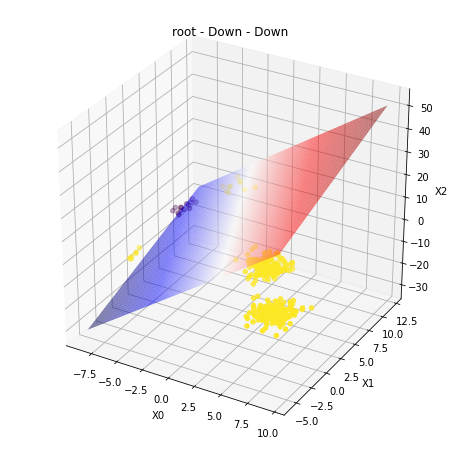

In [3]:

nodes = list(gr)
for i in range(3):
    nodes[i].plot_hyperplane()

In [5]:
%matplotlib widget
k = list(gr)[0]
k.plot_hyperplane()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
plt.close('all')

In [7]:
for i in gr:
    if i.is_leaf():
        gr.plot_distribution(i)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

ValueError: 'c' argument has 1500 elements, which is inconsistent with 'x' and 'y' with size 300.

In [9]:
%matplotlib inline
from trees.Snode import Snode
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_distribution(node: Snode, ax=None):
        #if ax is None:
        print("shapes", node._X.shape, node._y.shape)
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111, projection='3d')
        plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
        ax.scatter(node._X[:, 0], node._X[:, 1], node._X[:, 2], c=y)
        #ax.set_xlabel('X0')
        #ax.set_ylabel('X1')
        #ax.set_zlabel('X2')
        plt.show()

In [11]:
plt.close('all')

In [8]:
for i in list(gr):
    gr.plot_distribution(i)


TypeError: 'NoneType' object is not subscriptable

In [6]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

scale = 8
# Make data.
X = np.arange(-scale, scale, 0.25)
Y = np.arange(-scale, scale, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                   linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 100)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# rotate the axes and update
#for angle in range(0, 360):
#   ax.view_init(30, 40)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …